In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

import joblib  # model 저장용

In [2]:
(train_set, train_label), (test_set, test_label) = tf.keras.datasets.mnist.load_data()

In [3]:
train_set = train_set.reshape(len(train_set), -1)
test_set = test_set.reshape(len(test_set), -1)

In [4]:
clf = RandomForestClassifier()
clf.fit(train_set, train_label)

RandomForestClassifier()

In [5]:
pred = clf.predict(test_set)

In [6]:
confusion_matrix = [[0 for i in range(10)] for i in range(10)]

In [7]:
for i in range(len(test_set)):
    r = test_label[i]
    p = pred[i]
    
    confusion_matrix[r][p] += 1

In [8]:
confusion_matrix

[[971, 0, 0, 0, 0, 2, 3, 2, 2, 0],
 [0, 1125, 1, 3, 0, 1, 3, 0, 1, 1],
 [7, 0, 997, 5, 3, 0, 4, 10, 6, 0],
 [0, 0, 9, 975, 0, 6, 0, 9, 8, 3],
 [2, 0, 1, 0, 952, 0, 6, 1, 3, 17],
 [2, 0, 0, 12, 1, 860, 7, 1, 6, 3],
 [6, 3, 0, 0, 4, 5, 937, 0, 3, 0],
 [2, 4, 18, 2, 1, 0, 0, 987, 3, 11],
 [4, 0, 5, 7, 5, 5, 5, 4, 928, 11],
 [7, 5, 2, 9, 11, 2, 1, 4, 7, 961]]

# 시각화

In [14]:
x = [i for i in range(10)]
df = pd.DataFrame(confusion_matrix, index=x, columns=x)
for i in range(len(df)):
    for j in range(len(df[i])):
        df[i][j] = df[i][j] / sum(df[i])

df

C:\Users\AI-00\AppData\Local\Temp/ipykernel_22276/927055111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = df[i][j] / sum(df[i])


,0,1,2,3,4,5,6,7,8,9
0,0.970030,0.000000,0.000000,0.000000,0.000000,0.002270,0.003106,0.001965,0.002068,0.000000
1,0.000000,0.989446,0.000968,0.002962,0.000000,0.001138,0.003115,0.000000,0.001036,0.000993
2,0.226025,0.000000,0.966084,0.004950,0.003071,0.000000,0.004167,0.009843,0.006224,0.000000
3,0.000000,0.000000,0.250229,0.970142,0.000000,0.006834,0.000000,0.008946,0.008351,0.002982
4,0.082658,0.000000,0.036741,0.000000,0.977410,0.000000,0.006276,0.001003,0.003158,0.016949
5,0.089772,0.000000,0.000000,0.387371,0.043515,0.986227,0.007368,0.001004,0.006336,0.003043
6,0.294573,0.230957,0.000000,0.000000,0.181620,0.384720,0.993612,0.000000,0.003188,0.000000
7,0.136397,0.391374,0.685609,0.103277,0.054928,0.000000,0.000000,0.991937,0.003198,0.011190
8,0.312513,0.000000,0.559307,0.400717,0.289678,0.596574,0.712490,0.443720,0.992478,0.011316
9,0.768220,0.756226,0.444549,0.828011,0.876479,0.502795,0.366282,0.732813,0.872161,0.999952


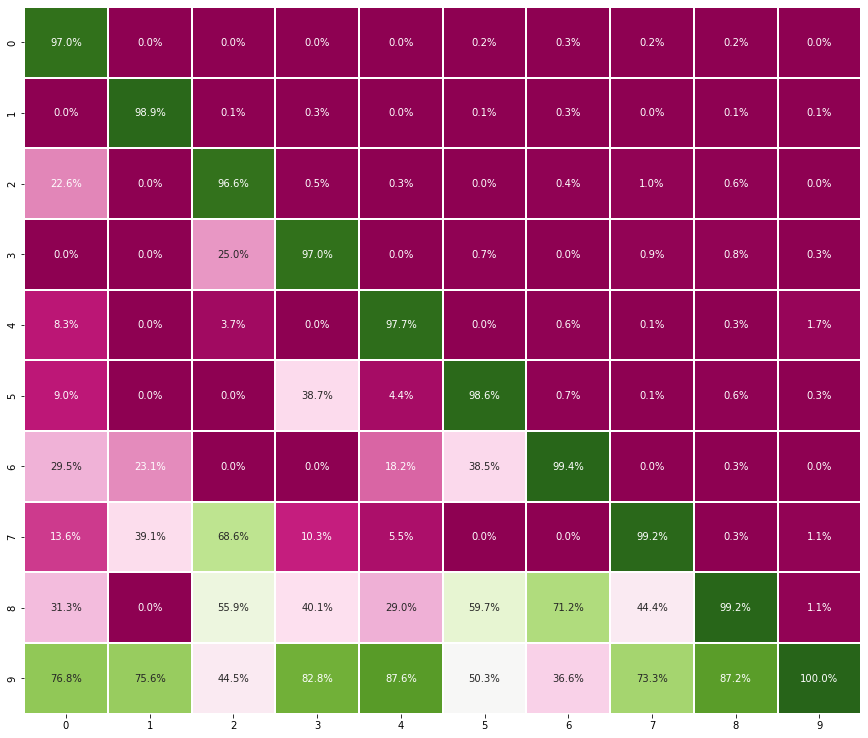

In [18]:
fig, ax = plt.subplots(figsize=(15,13))
ax = sns.heatmap(df,
                 cmap="PiYG",              # cmap Color
                 cbar=False,
                 annot=True,               # Value Text
                 fmt=".1%",                  # Value type (interge = "d")
                 linewidths=2)